In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
from statistics import stdev
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import stdev, mean

In [2]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'META', 'GOOG']
df = yf.download(tickers, '2014-01-01', '2023-12-31')
df.head()

[*********************100%%**********************]  5 of 5 completed


Price       Adj Close                                                  Close  \
Ticker           AAPL       GOOG       META       MSFT       TSLA       AAPL   
Date                                                                           
2014-01-02  17.296656  27.724083  54.652012  31.233065  10.006667  19.754642   
2014-01-03  16.916714  27.521841  54.502174  31.022945   9.970667  19.320715   
2014-01-06  17.008966  27.828691  57.139374  30.367342   9.800000  19.426071   
2014-01-07  16.887333  28.365179  57.858608  30.602682   9.957333  19.287144   
2014-01-08  16.994270  28.424210  58.168282  30.056355  10.085333  19.409286   

Price                                                   ...       Open  \
Ticker           GOOG       META       MSFT       TSLA  ...       AAPL   
Date                                                    ...              
2014-01-02  27.724083  54.709999  37.160000  10.006667  ...  19.845715   
2014-01-03  27.521841  54.560001  36.910000   9.970667  ...  19.745001   
2014-01-06  27.828691  57.200001  36.130001   9.800000  ...  19.194643   
2014-01-07  28.365179  57.919998  36.410000   9.957333  ...  19.440001   
2014-01-08  28.424210  58.230000  35.759998  10.085333  ...  19.243214   

Price                                                      Volume             \
Ticker           GOOG       META       MSFT       TSLA       AAPL       GOOG   
Date                                                                           
2014-01-02  27.782366  54.830002  37.349998   9.986667  234684800   73129082   
2014-01-03  27.770908  55.020000  37.200001  10.000000  392467600   66917888   
2014-01-06  27.721344  54.419998  36.849998  10.000000  412610800   71037271   
2014-01-07  28.019974  57.700001  36.330002   9.841333  317209200  102486711   
2014-01-08  28.543015  57.599998  36.000000   9.923333  258529600   90036218   

Price                                     
Ticker          META      MSFT      TSLA  
Date                                      
2014-01-02  43195500  30632200  92826000  
2014-01-03  38246200  31134800  70425000  
2014-01-06  68852600  43603700  80416500  
2014-01-07  77207400  35802800  75511500  
2014-01-08  56682400  59971700  92448000  

[5 rows x 30 columns]

In [6]:
df_diffs = df['Adj Close'].diff()
df_diffs.head()

Ticker,AAPL,GOOG,META,MSFT,TSLA
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.379932,-0.202242,-0.149837,-0.210127,-0.036000
2014-01-06,0.092241,0.306850,2.637199,-0.655592,-0.170667
2014-01-07,-0.121641,0.536488,0.719234,0.235340,0.157332
2014-01-08,0.106943,0.059031,0.309673,-0.546328,0.128000


<AxesSubplot:xlabel='Date'>

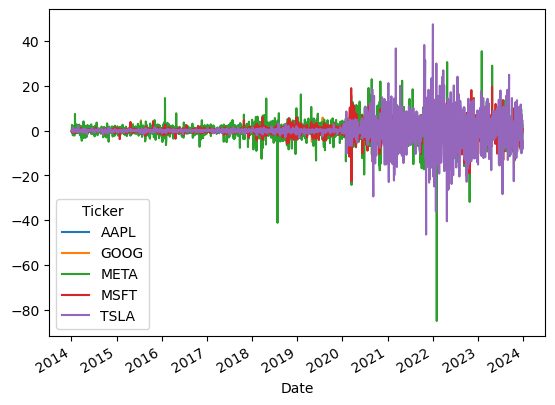

In [7]:
df_diffs.plot()

In [20]:
url = 'https://en.m.wikipedia.org/wiki/Nasdaq-100'
df_nasdaq100 = pd.read_html(url, attrs={'id': "constituents"}, index_col='Ticker')[0]
tickers = list(df_nasdaq100.index)
df_nasdaq_100 = yf.download(tickers, '2023-01-01', '2023-12-31')
df_nasdaq_100.head()

[*********************100%%**********************]  101 of 101 completed


Price        Adj Close                                                 \
Ticker            AAPL       ABNB        ADBE         ADI         ADP   
Date                                                                    
2023-01-03  124.216293  84.900002  336.920013  159.414200  232.378464   
2023-01-04  125.497498  88.720001  341.410004  162.809555  233.473587   
2023-01-05  124.166641  87.709999  328.440002  156.705780  228.438034   
2023-01-06  128.735245  88.519997  332.750000  162.426819  234.822937   
2023-01-09  129.261642  89.239998  341.980011  163.977310  234.187378   

Price                                                                 ...  \
Ticker            ADSK        AEP        AMAT        AMD        AMGN  ...   
Date                                                                  ...   
2023-01-03  185.149994  90.119865   95.679520  64.019997  250.923462  ...   
2023-01-04  187.960007  90.737312   98.231483  64.660004  253.551178  ...   
2023-01-05  182.070007  89.084442   96.856598  62.330002  255.919876  ...   
2023-01-06  187.190002  91.696747  103.137627  63.959999  263.917999  ...   
2023-01-09  192.470001  93.045654  105.333519  67.239998  259.046265  ...   

Price        Volume                                                          \
Ticker          TTD     TTWO      TXN     VRSK     VRTX       WBA       WBD   
Date                                                                          
2023-01-03  2855600  1668600  4294100   644400  1100400   7377200  25186100   
2023-01-04  4653700  1474800  6285300   603200  1137400   7987000  34435900   
2023-01-05  3908000  1218400  6876800   693300  1187000  19328200  33761600   
2023-01-06  3976700  2602800  6725900   728700   943400  10009800  29842600   
2023-01-09  4005300  2185800  5733900  1095800  1299200   9435000  25383800   

Price                                  
Ticker         WDAY      XEL       ZS  
Date                                   
2023-01-03  2094000  2684500  2510900  
2023-01-04  1660200  2265900  1617000  
2023-01-05  3003800  2104500  3931100  
2023-01-06  1910300  2976200  2613100  
2023-01-09  1727600  2707800  2961300  

[5 rows x 606 columns]

Text(0, 0.5, 'stdev of daily closing adj price')

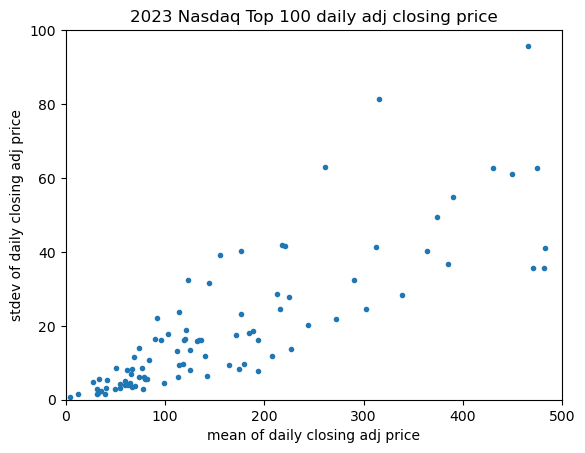

In [21]:
means  = [df_nasdaq_100['Adj Close'].mean()[t] for t in tickers]
sigmas = [df_nasdaq_100['Adj Close'].std()[t]  for t in tickers]
plt.scatter(means, sigmas, marker='.')
plt.xlim([0, 500])
plt.ylim([0, 100])
plt.title('2023 Nasdaq Top 100 daily adj closing price')
plt.xlabel('mean of daily closing adj price')
plt.ylabel('stdev of daily closing adj price')

Text(0, 0.5, 'stdev of daily change in adj close')

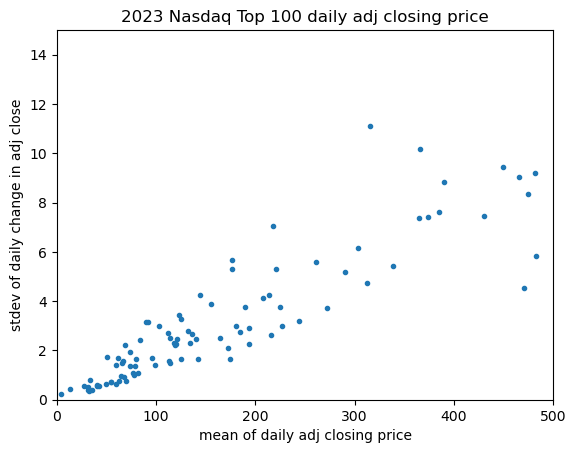

In [22]:
df_diffs = df_nasdaq_100['Adj Close'].diff()
means = {t:df_nasdaq_100['Adj Close'].mean()[t] for t in tickers}
volatilities = {t:stdev([x for x in list(df_diffs[t]) if x == x]) for t in tickers}
means = [x[1] for x in sorted(means.items())]
volatilities = [x[1] for x in sorted(volatilities.items())]
plt.scatter(means, volatilities, marker='.')
plt.xlim([0, 500])
plt.ylim([0, 15])
plt.title('2023 Nasdaq Top 100 daily adj closing price')
plt.xlabel('mean of daily adj closing price')
plt.ylabel('stdev of daily change in adj close')

In [128]:
def show_volatilities(df, relative=False, price_col='Adj Close'):
    if relative:
        df_diffs = df[price_col].pct_change()
    else:
        df_diffs = df[price_col].diff()
    tickers = list(df_diffs.columns)
    df_diffs['Year'] = df_diffs.index.year
    df_diffs.head()
    sigmas = defaultdict(lambda: [])
    years = sorted(list(set(list(df_diffs['Year']))))
    for t in tickers:
        for y in years:
            li = list(df_diffs.loc[df_diffs['Year'] == y][t])
            # get rid of nans:
            li = [x for x in li if x == x]
            s = stdev(li)            
            sigmas[t].append(s)
    legend = []
    errors = defaultdict()
    for t, series in sigmas.items():
        plt.plot(years, series, marker='o')
        legend.append(t)
        estimate = mean(series[:-1])
        actual = series[-1]
        abs_error = abs(estimate - actual)
        rel_error = abs_error / actual
        mul = 100 if relative else 1
        errors[t] = (actual*mul, estimate*mul, abs_error*mul, rel_error)
    for t, e in errors.items():
        if relative:
            print(f'The actual 2023 stdev for {t} was {e[0]:.2f}%, the historic estimate was {e[1]:.2f}%, an absolute error of {e[2]:.2f}% (relative {100*e[3]:.1f}%)')
        else:
            print(f'The actual 2023 stdev for {t} was ${e[0]:.2f}, the historic estimate was ${e[1]:.2f}, an absolute error of ${e[2]:.2f} (relative {100*e[3]:.1f}%)')
    print()
    plt.legend(legend)
    plt.xlabel('year')
    plt.ylabel(f'annual{" normalized " if relative else " "}sigma of daily {price_col.lower()}')

In [4]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'META', 'GOOG']
df_tech = yf.download(tickers, '2014-01-01', '2023-12-31')

[*********************100%%**********************]  5 of 5 completed


The actual 2023 stdev for AAPL was $2.13, the historic estimate was $1.24, an absolute error of $0.90 (relative 42.0%)
The actual 2023 stdev for GOOG was $2.25, the historic estimate was $1.10, an absolute error of $1.15 (relative 51.2%)
The actual 2023 stdev for META was $5.57, the historic estimate was $3.81, an absolute error of $1.76 (relative 31.5%)
The actual 2023 stdev for MSFT was $4.73, the historic estimate was $2.18, an absolute error of $2.55 (relative 53.9%)
The actual 2023 stdev for TSLA was $7.11, the historic estimate was $3.20, an absolute error of $3.91 (relative 55.0%)



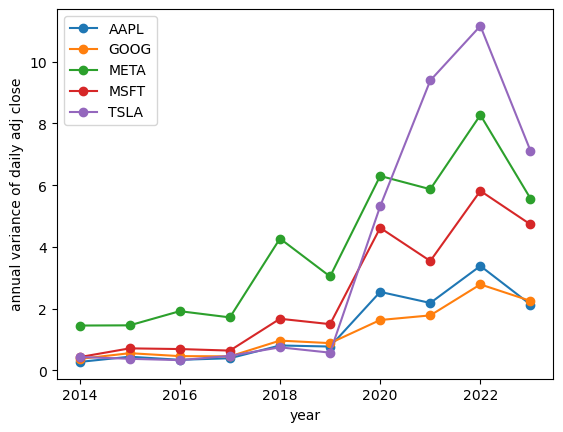

In [16]:
show_volatilities(df_tech, relative=False)

The actual 2023 stdev for AAPL was 1.28%, the historic estimate was 1.76%, an absolute error of 0.48% (relative 37.7%)
The actual 2023 stdev for GOOG was 1.93%, the historic estimate was 1.67%, an absolute error of 0.25% (relative 13.0%)
The actual 2023 stdev for META was 2.51%, the historic estimate was 2.19%, an absolute error of 0.33% (relative 12.9%)
The actual 2023 stdev for MSFT was 1.58%, the historic estimate was 1.63%, an absolute error of 0.05% (relative 3.3%)
The actual 2023 stdev for TSLA was 3.40%, the historic estimate was 3.36%, an absolute error of 0.05% (relative 1.3%)



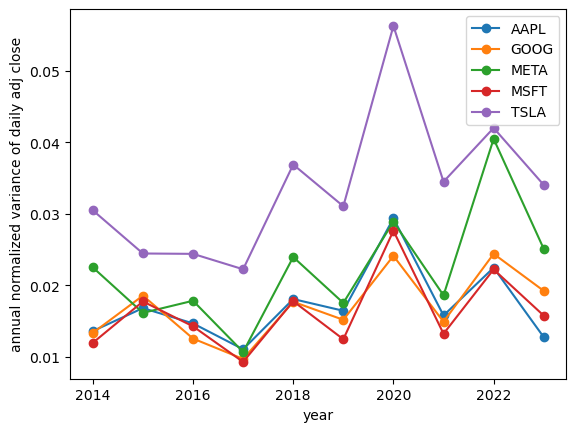

In [17]:
show_volatilities(df_tech, relative=True)

In [137]:
# https://finance.yahoo.com/world-indices/
tickers = ['^GSPC', '^DJI', '^IXIC', '^GDAXI', '^N225']
df_indices = yf.download(tickers, '2014-01-01', '2023-12-31')

[*********************100%%**********************]  5 of 5 completed


The actual 2023 stdev for ^DJI was $240.03, the historic estimate was $244.99, an absolute error of $4.96 (relative 2.1%)
The actual 2023 stdev for ^GDAXI was $126.21, the historic estimate was $140.28, an absolute error of $14.07 (relative 11.1%)
The actual 2023 stdev for ^GSPC was $34.77, the historic estimate was $29.88, an absolute error of $4.89 (relative 14.1%)
The actual 2023 stdev for ^IXIC was $139.37, the historic estimate was $105.53, an absolute error of $33.84 (relative 24.3%)
The actual 2023 stdev for ^N225 was $308.03, the historic estimate was $256.13, an absolute error of $51.90 (relative 16.8%)



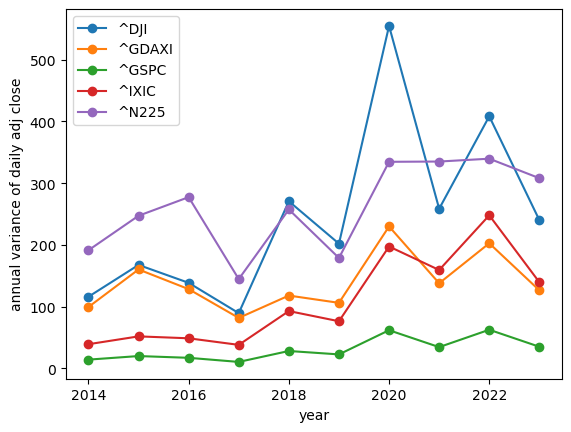

In [18]:
show_volatilities(df_indices, relative=False)

The actual 2023 stdev for ^DJI was 0.70%, the historic estimate was 1.00%, an absolute error of 0.29% (relative 41.6%)
The actual 2023 stdev for ^GDAXI was 0.81%, the historic estimate was 1.19%, an absolute error of 0.38% (relative 47.0%)
The actual 2023 stdev for ^GSPC was 0.81%, the historic estimate was 1.02%, an absolute error of 0.21% (relative 25.9%)
The actual 2023 stdev for ^IXIC was 1.07%, the historic estimate was 1.23%, an absolute error of 0.16% (relative 14.4%)
The actual 2023 stdev for ^N225 was 0.98%, the historic estimate was 1.21%, an absolute error of 0.23% (relative 23.1%)



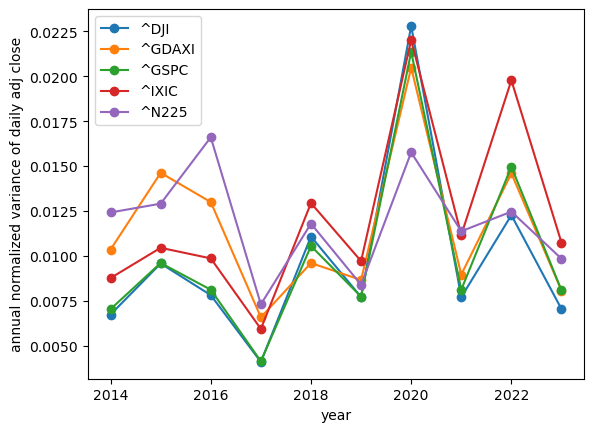

In [19]:
show_volatilities(df_indices, relative=True)

In [23]:
def show_yoy_volatilities(df, relative=False, price_col='Adj Close'):
    if relative:
        df_diffs = df[price_col].pct_change()
    else:
        df_diffs = df[price_col].diff()
    tickers = list(df_diffs.columns)
    df_diffs['Year'] = df_diffs.index.year
    df_diffs.head()
    sigmas = defaultdict(lambda: [])
    years = sorted(list(set(list(df_diffs['Year']))))
    for t in tickers:
        for y in years:
            li = list(df_diffs.loc[df_diffs['Year'] == y][t])
            # get rid of nans:
            li = [x for x in li if x == x]
            s = stdev(li)            
            sigmas[t].append(s)
    legend = []
    errors = defaultdict(lambda: [])
    for t, series in sigmas.items():
        for i in range(len(series)-1):
            cy = series[i+1] # current year
            py = series[i]   # previous year
            abs_error = abs(cy - py)
            rel_error = abs_error / cy
            errors[t].append(rel_error)
    legend = []
    for t, e in errors.items():
        legend.append(t)
        plt.plot(years[1:], e, marker='o')
    print()
    plt.legend(legend)
    plt.xlabel('year')
    plt.ylabel(f'yoy annual{" normalized " if relative else " "}sigma of daily {price_col.lower()}')

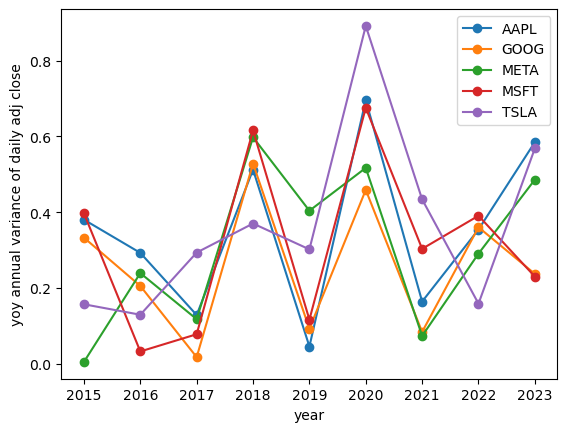

In [24]:
show_yoy_volatilities(df_tech, relative=False)

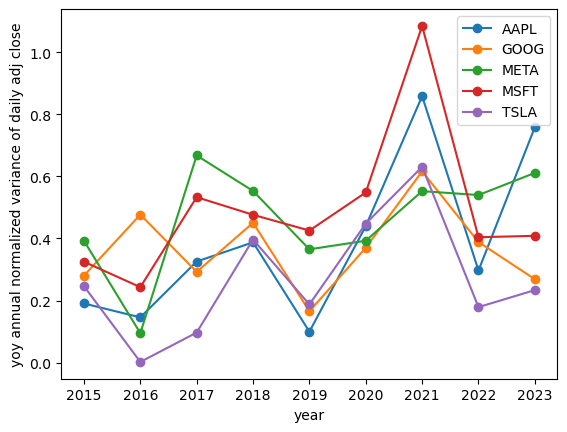

In [25]:
show_yoy_volatilities(df_tech, relative=True)

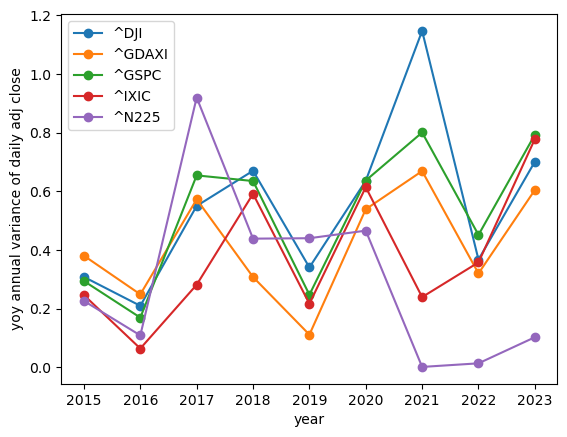

In [26]:
show_yoy_volatilities(df_indices, relative=False)

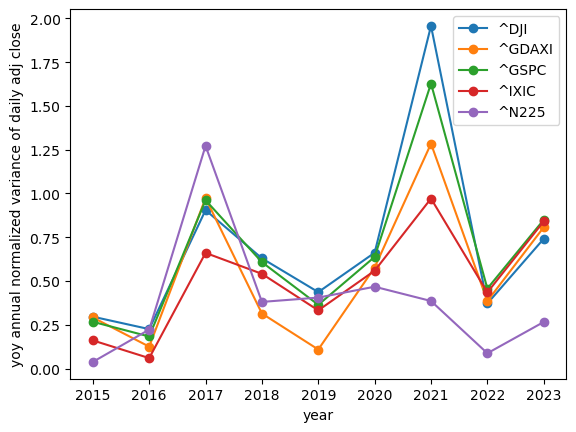

In [27]:
show_yoy_volatilities(df_indices, relative=True)

In [5]:
#################

In [18]:
df_diffs = df_tech['Adj Close'].pct_change()
for t in tickers:
    df_diffs[t] += 1
df_logreturns = np.log10(df_diffs)
df_logreturns.dropna(inplace=True)

<AxesSubplot:>

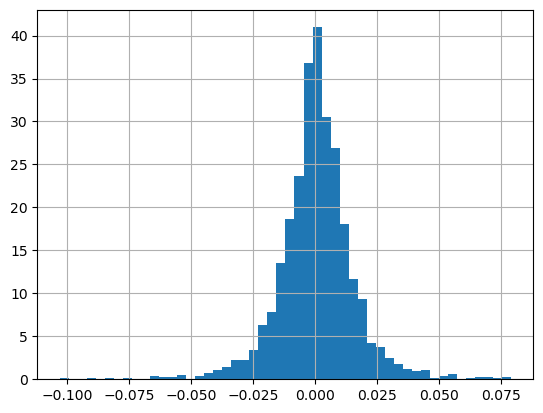

In [33]:
df_logreturns['TSLA'].hist(bins=50, density=True)

In [185]:
def show_strategy_returns(df,  price_col='Adj Close', position_length=66, take_profit=1.5, stop_loss=0.5):
    df['Year'] = df.index.year
    years = list(df['Year'])
    sigmas = defaultdict(lambda: [])
    tickers = set([x[1] for x in list(df.columns) if x[1] != ''])
    for index, t in enumerate(tickers):
        li = list(df[price_col][t])
        returns = []
        for i, start_price in enumerate(li):
            tail = li[i+1:i+1+position_length]
            if len(tail) < position_length: break
            for daily_price in tail:
                if daily_price >= start_price * take_profit:
                    final_price = start_price * take_profit
                    break
                if daily_price <= start_price * stop_loss:
                    final_price = start_price * stop_loss
                    break
                final_price = daily_price
            r = (final_price - start_price) / start_price
            returns.append(r)
        df_returns = pd.DataFrame(returns, columns=['returns'])
        df_returns.hist(bins=50, density=True)
        plt.title(t)
        # compute annual variance
        years = years[:len(returns)]
        sigmas[t] = [stdev([x[1] for x in zip(years, returns) if x[0] == year and x[1] == x[1]]) for year in set(years)]
    df_returns.hist(bins=50, density=True) # dummy
    plt.clf()
    legend = []
    for t, s in sigmas.items():
        legend.append(t)
        plt.plot(sorted(set(years)), s, marker='o')
    plt.legend(legend)
    plt.xlabel('year')
    plt.ylabel(f'sigma of strategy')
    plt.ylim(0, )

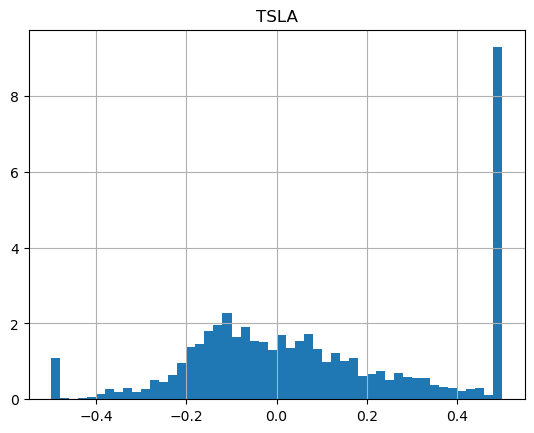

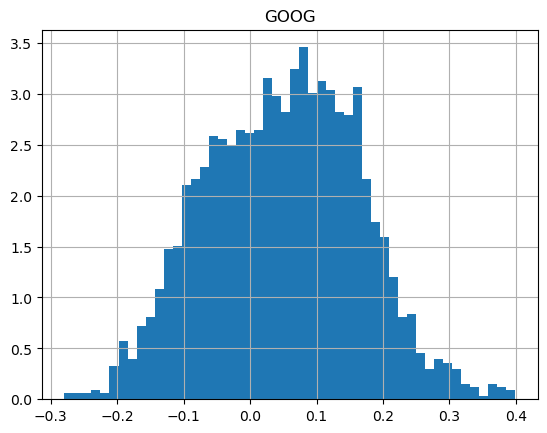

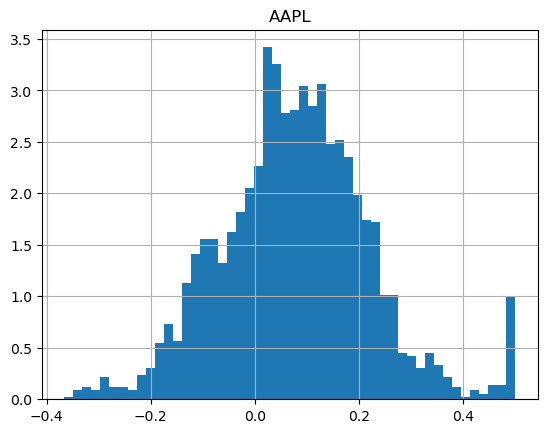

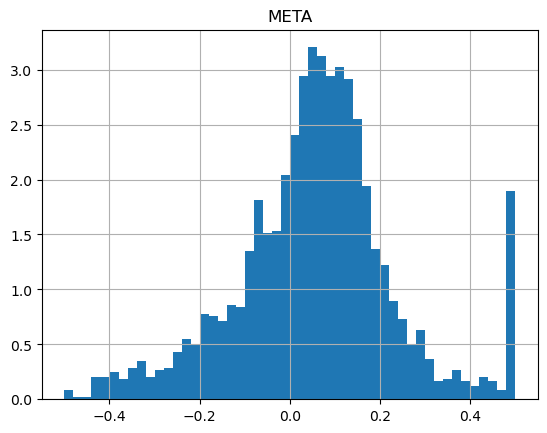

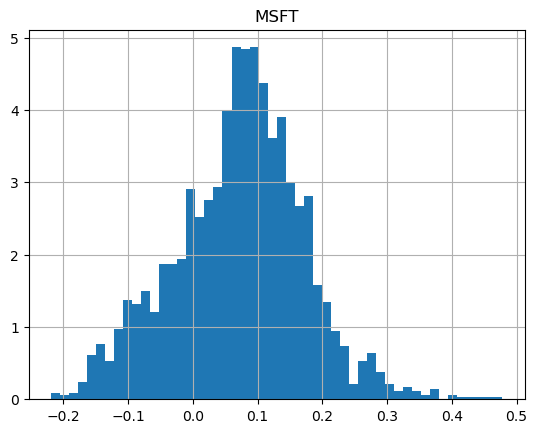

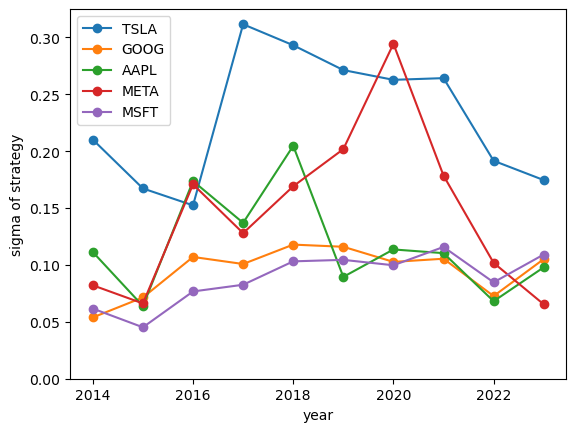

In [184]:
show_strategy_returns(df_tech, position_length=66, take_profit=1.5, stop_loss=0.5)

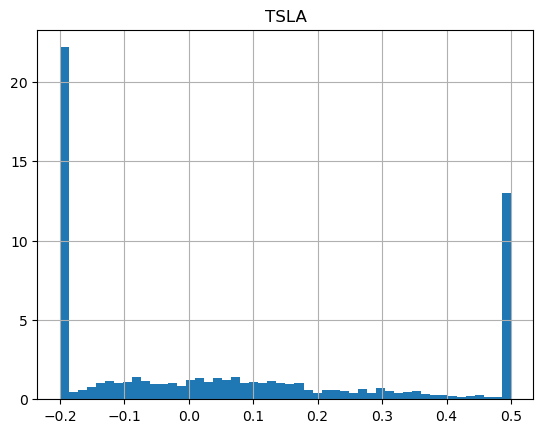

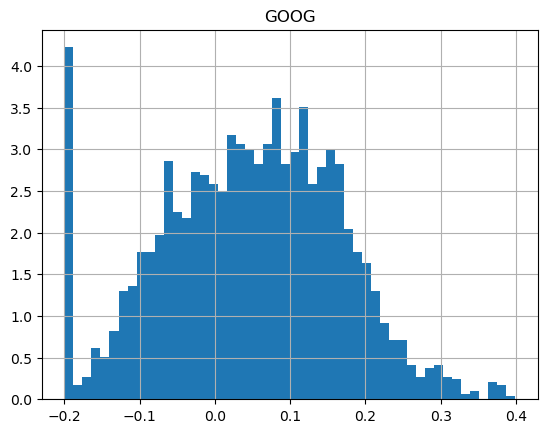

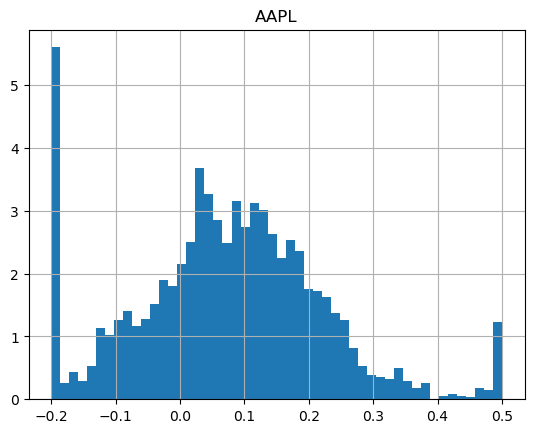

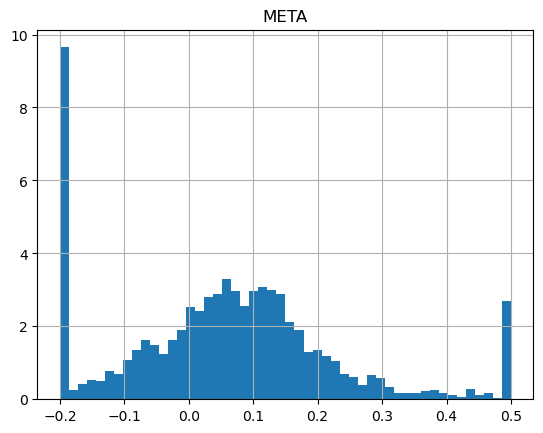

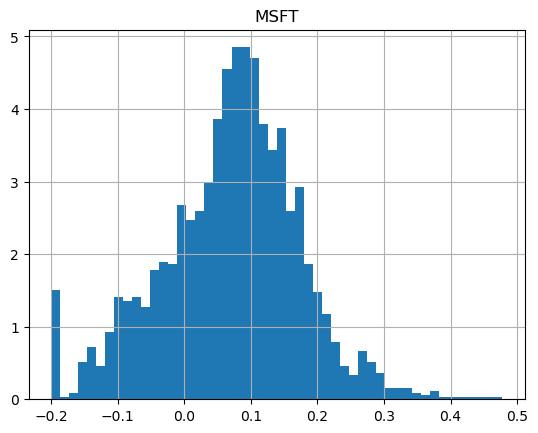

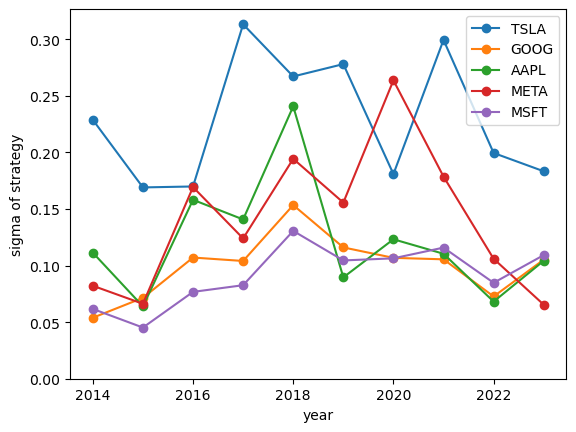

In [186]:
show_strategy_returns(df_tech, position_length=66, take_profit=1.5, stop_loss=0.8)

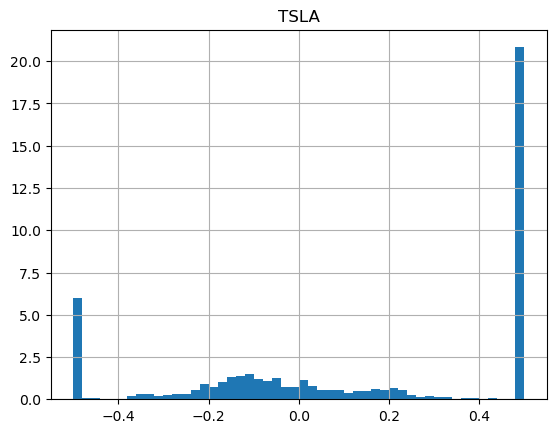

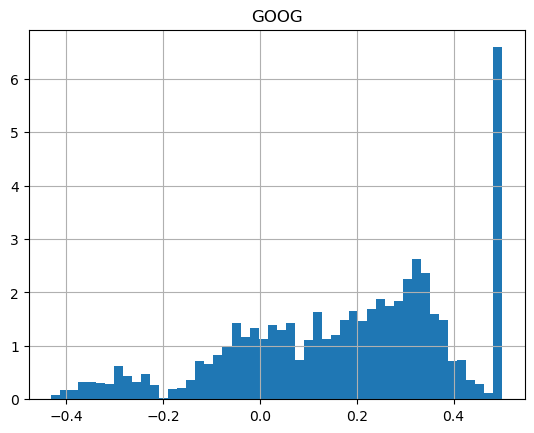

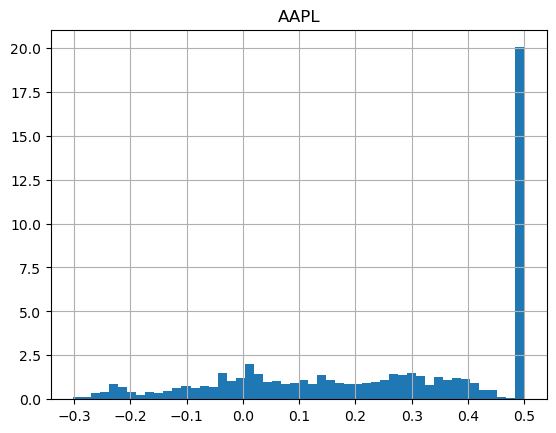

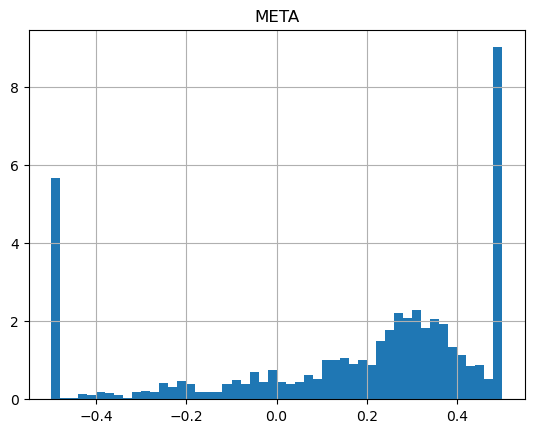

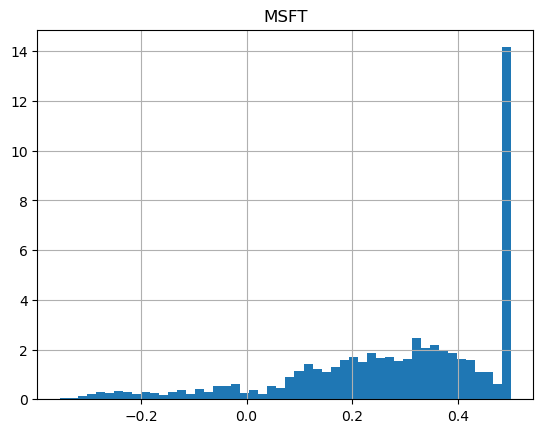

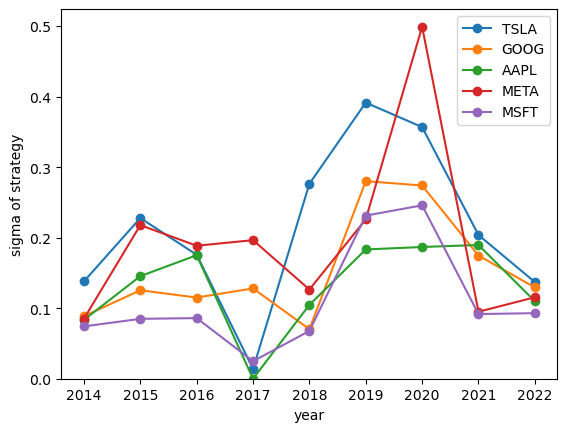

In [187]:
show_strategy_returns(df_tech, position_length=252, take_profit=1.5, stop_loss=0.5)

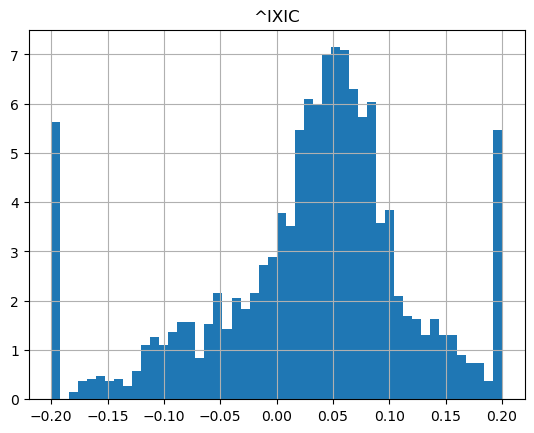

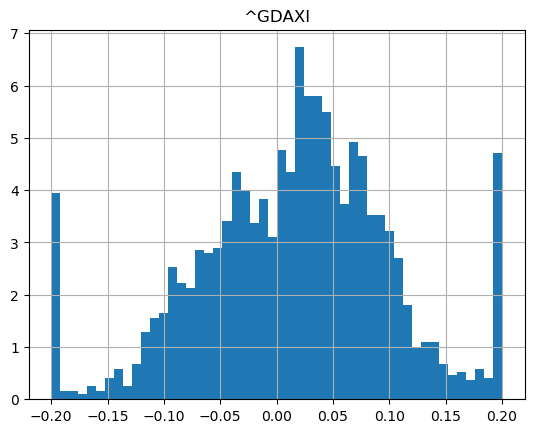

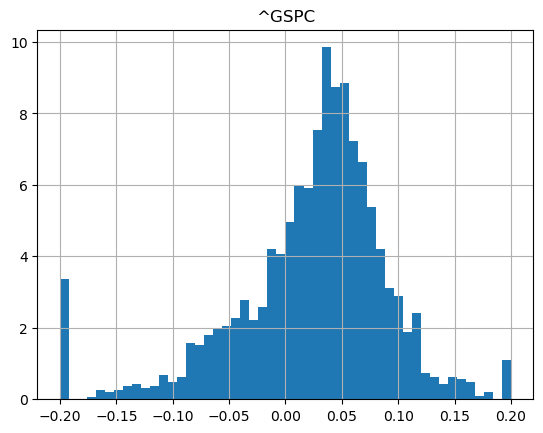

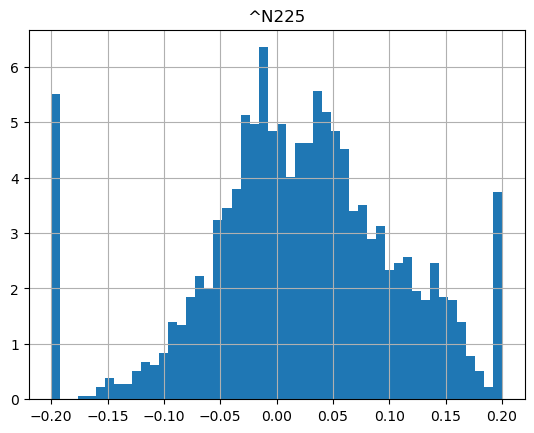

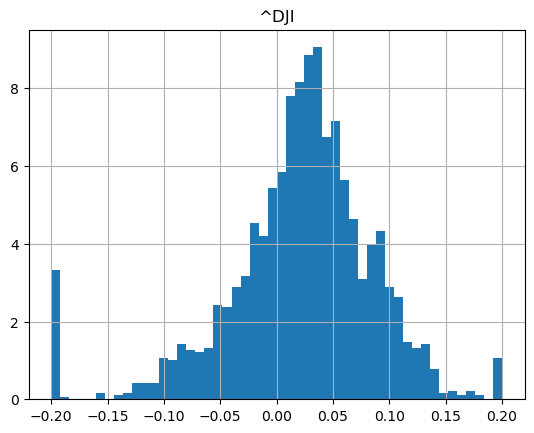

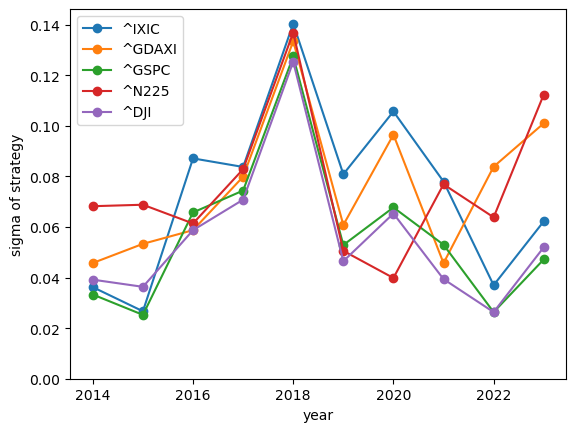

In [188]:
show_strategy_returns(df_indices, position_length=66, take_profit=1.2, stop_loss=0.8)

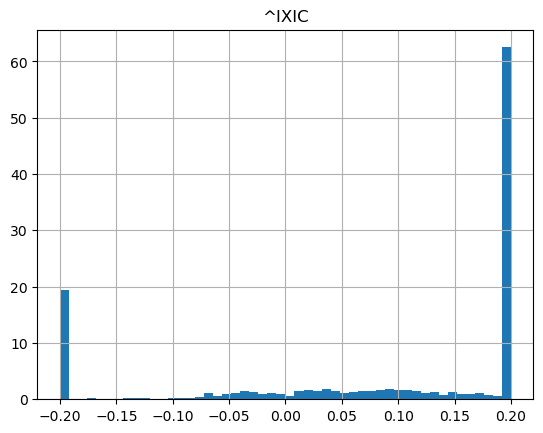

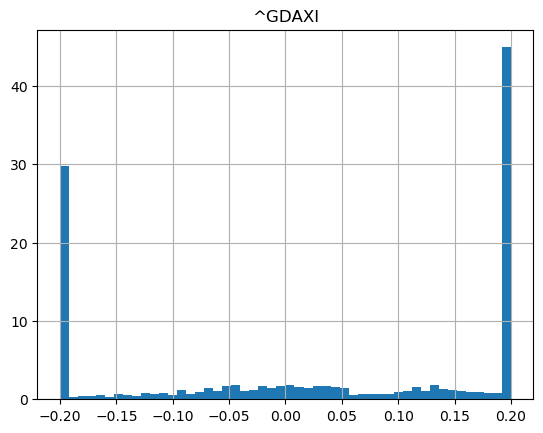

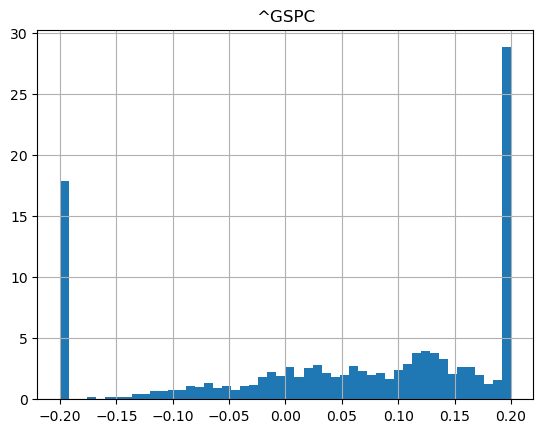

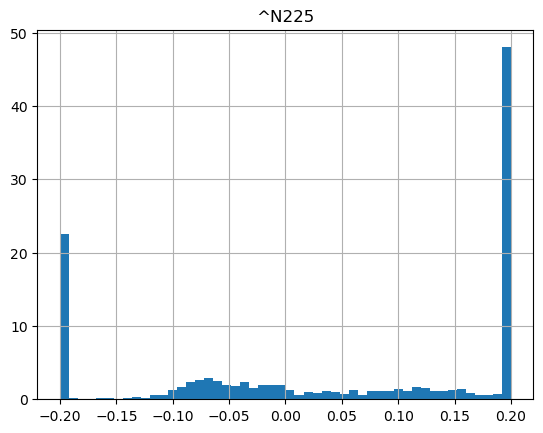

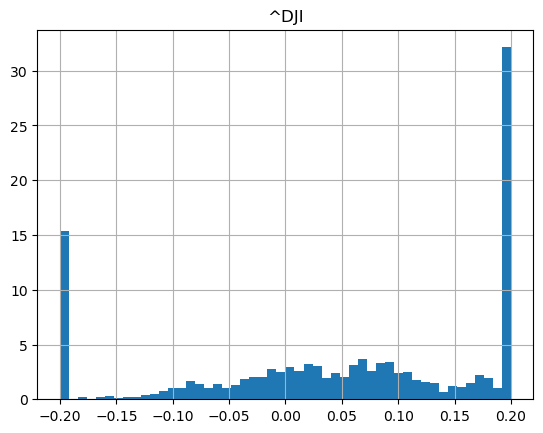

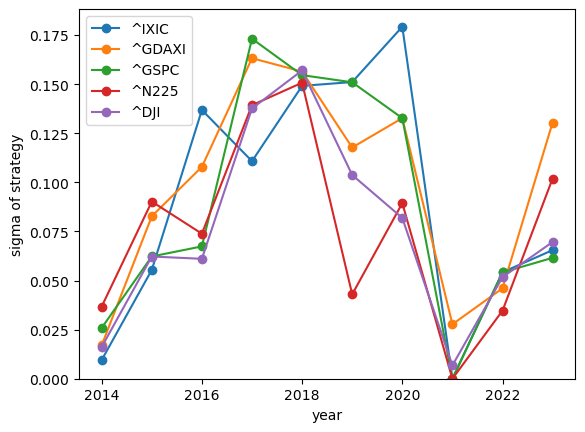

In [189]:
show_strategy_returns(df_indices, position_length=252, take_profit=1.2, stop_loss=0.8)